$\newcommand{L}[1]{\| #1 \|}\newcommand{VL}[1]{\L{ \vec{#1} }}\newcommand{R}[1]{\operatorname{Re}\,(#1)}\newcommand{I}[1]{\operatorname{Im}\, (#1)}$

## Introduction to the general linear model

These are some notes on simple regression, multiple regression, and the
general linear model.

For more detail, see [The general linear model and fMRI: Does love last
forever?](http://matthew.dynevor.org/_downloads/does_glm_love.pdf).

This page starts by setting up a simple regression. Then I will try to
show how the simple regression gets expressed in a *design matrix*. Once
we have that, it's easy to extend simple regression to multiple
regression. By adding some specially formed regressors, we can also
express group membership, and therefore do analysis of variance. This
last step is where multiple regression becomes the general linear model.

### About this page

We go through regression and the general linear model slowly, showing
how it works in symbols, and in code, with actual numbers.

### The example regression problem

Let's imagine that we have measured scores for a "psychopathy"
personality trait in 12 students. We also have some other information
about these students. For example, we measured how much sweat each
student had on their palms, and we call this a "clammy" score. We first
try and work out whether the "clammy" score predicts the "psychopathy"
score. We'll do this with simple linear regression.

### Simple linear regression

We first need to get our environment set up to run the code and plots we
need.

In [1]:
# Import numerical and plotting libraries
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
# Only show 6 decimals when printing
np.set_printoptions(precision=6)

In [2]:
%matplotlib inline

Here are our scores of "psychopathy" from the 12 students:

In [3]:
psychopathy = [11.416,   4.514,  12.204,  14.835,
               8.416,   6.563,  17.343, 13.02,
               15.19 ,  11.902,  22.721,  22.324]

These are the skin-conductance scores to get a measure of clamminess for
the handshakes of each student:

In [4]:
clammy = [0.389,  0.2  ,  0.241,  0.463,
          4.585,  1.097,  1.642,  4.972,
          7.957,  5.585,  5.527,  6.964]

We happen to believe that there is some relationship between `clammy`
and `psychopathy`. Plotting them together we get:

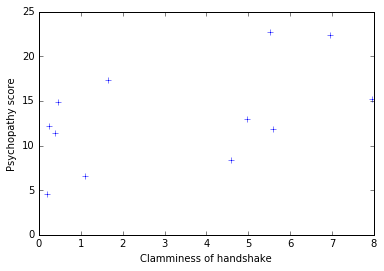

In [5]:
plt.plot(clammy, psychopathy, '+')
plt.xlabel('Clamminess of handshake')
plt.ylabel('Psychopathy score')

It looks like there may be some sort of straight line relationship. We
could try guessing at a line to fit the data. Let's try an intercept of
$10$ and slope $0.9$:

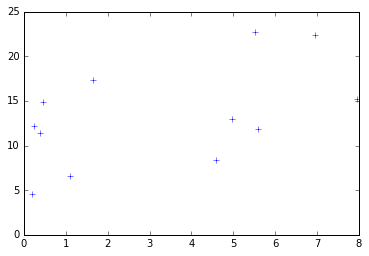

In [6]:
# Plot the data
plt.plot(clammy, psychopathy, '+')

In [7]:
def my_line(x):
    # My prediction for psychopathy given clamminess
    return 10 + 0.9 * x

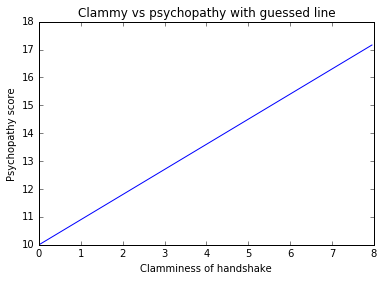

In [8]:
# Plot the prediction
x_vals = [0, max(clammy)]
y_vals = [my_line(0), my_line(max(clammy))]
plt.plot(x_vals, y_vals)
plt.xlabel('Clamminess of handshake')
plt.ylabel('Psychopathy score')
plt.title('Clammy vs psychopathy with guessed line')

What does our straight line relationship mean?

We are saying that the values of `psychopathy` can be partly predicted by
a straight line of formula `10 + clammy \* 0.9`.

$\newcommand{\yvec}{\vec{y}} \newcommand{\xvec}{\vec{x}} \newcommand{\evec}{\vec{\varepsilon}}$

To make this more general, let's call our `psychopathy` data
$\yvec$ - a vector with 12 values, one for each student.
$y_1$ is the value for the first student (= 11.416) and
$y_i$ is the value for student $i$ where
$i \in 1 .. 12$.

Our `clammy` score is a predictor. Lets call the clammy scores $\xvec$
— another vector with 12 values. $x_1$ is the value for the first
student (= 0.389) and $x_i$ is the value for student $i$ where
$i \in 1 .. 12$.

Our straight line model says:

$y_i \approx c + bx_i$

where $c$ is the intercept and $b$ is the slope. For the guessed
line above:

$y_i \approx 10 + 0.9 x_i$

With the $\approx$ above, we are accepting that we will not succeed in
explaining all the variation in our psychopathy data. We can rephrase this by
saying that each observation is equal to the predicted value (from the formula
above) plus some error for each observation:

$y_i = c + bx_i + e_i$

# Simple regression in matrix form

It turns out it will be useful to rephrase the simple regression model
in matrix form. Let's make the data and predictor and errors into
vectors.

$\yvec$ is the vector of values $y_1 ... y_{12}$.

$$
\left[\begin{matrix}11.416\\4.514\\12.204\\14.835\\8.416\\6.563\\17.343\\13.02\\15.19\\11.902\\22.721\\22.324\end{matrix}\right]
$$

$\xvec$ is the vector of values $x_1 ... x_{12}$:

$$
\left[\begin{matrix}0.389\\0.2\\0.241\\0.463\\4.585\\1.097\\1.642\\4.972\\7.957\\5.585\\5.527\\6.964\end{matrix}\right]
$$

$\evec$ is the vector of errors $e_1 ... e_{12}$:

$$
\left[\begin{matrix}e_{1}\\e_{2}\\e_{3}\\e_{4}\\e_{5}\\e_{6}\\e_{7}\\e_{8}\\e_{9}\\e_{10}\\e_{11}\\e_{12}\end{matrix}\right]
$$

Now we can rephrase our model as:

$$
\yvec = c + b \xvec + \evec
$$

Bear with with us for a little trick. If $\mathbf{o}$ is a vector
of ones, then we can rewrite the formula as:

$$
\yvec = c\mathbf{o} + b\xvec + \evec
$$

because $o_i = 1$ and so $co_i = c$.

$$
\left[\begin{matrix}11.416\\4.514\\12.204\\14.835\\8.416\\6.563\\17.343\\13.02\\15.19\\11.902\\22.721\\22.324\end{matrix}\right] = c \left[\begin{matrix}1\\1\\1\\1\\1\\1\\1\\1\\1\\1\\1\\1\end{matrix}\right] + b \left[\begin{matrix}0.389\\0.2\\0.241\\0.463\\4.585\\1.097\\1.642\\4.972\\7.957\\5.585\\5.527\\6.964\end{matrix}\right] + \left[\begin{matrix}e_{1}\\e_{2}\\e_{3}\\e_{4}\\e_{5}\\e_{6}\\e_{7}\\e_{8}\\e_{9}\\e_{10}\\e_{11}\\e_{12}\end{matrix}\right]
$$

$\newcommand{Xmat}{\boldsymbol X} \newcommand{\bvec}{\vec{\beta}}$

We can now rephrase the calculation in terms of matrix multiplication.

Call $\Xmat$ the matrix of two columns, where the first column is
the column of ones ($\mathbf{o}$ above) and the second column is
$\xvec$. Call $\bvec$ the column vector:

$$
\left[
\begin{array}{\bvec}
c \\
b \\
\end{array}
\right]
$$

This gives us the same formula as `matrix-addition` but in terms of matrix
multiplication:

$$
\left[\begin{matrix}11.416\\4.514\\12.204\\14.835\\8.416\\6.563\\17.343\\13.02\\15.19\\11.902\\22.721\\22.324\end{matrix}\right] = \left[\begin{matrix}1 & 0.389\\1 & 0.2\\1 & 0.241\\1 & 0.463\\1 & 4.585\\1 & 1.097\\1 & 1.642\\1 & 4.972\\1 & 7.957\\1 & 5.585\\1 & 5.527\\1 & 6.964\end{matrix}\right] \left[\begin{matrix}c\\b\end{matrix}\right] + \left[\begin{matrix}e_{1}\\e_{2}\\e_{3}\\e_{4}\\e_{5}\\e_{6}\\e_{7}\\e_{8}\\e_{9}\\e_{10}\\e_{11}\\e_{12}\end{matrix}\right]
$$

In symbols:

$$
\yvec = \Xmat \bvec + \evec
$$

We still haven't found our best fitting line. But before we go further,
it might be obvious that we can easily add a new predictor here.

## Multiple regression

Let's say we think that psychopathy increases with age. We add the
student's age as another predictor:

In [9]:
age = [22.5,  25.3,  24.6,  21.4,
       20.7,  23.3,  23.8,  21.7,
       21.3, 25.2,  24.6,  21.8]

$$
\left[\begin{matrix}22.5\\25.3\\24.6\\21.4\\20.7\\23.3\\23.8\\21.7\\21.3\\25.2\\24.6\\21.8\end{matrix}\right]
$$

Now rename the `clammy` predictor vector from $\xvec$ to
$\xvec_1$. Of course $\xvec_1$ has 12 values $x_{1, 1}..x_{1,
12}$. Call the `age` predictor vector $\xvec_2$. Call the slope for
`clammy` $b_1$ (slope for $\xvec_1$). Call the slope for age
$b_2$ (slope for $\xvec_2$). Our model is:

$$
y_i = c + b_1 x_{1, i} + b_2 x_{2, i} + e_i


$$

In this model $\Xmat$ has three columns (ones, $\xvec_1$, and
$\xvec_2$), and the $\bvec$ vector has three values $c, b_1,
b_2$. This gives the same matrix formulation, with our new $\Xmat$ and
$\bvec$: $\yvec = \Xmat \bvec + \evec$.

This is a *linear* model because our model says that the data $y_i$ comes
from the *sum* of some components ($c, b_1 x_{1, i}, b_2 x_{2, i}, e_i$).

We can keep doing this by adding more and more regressors. In general, a linear model with $p$ predictors looks like this:

$$
y_i = b_1 x_{1, i} + b_2 x_{2, i} + ... b_p x_{p, i} + e_i


$$

In the case of the models above, the first predictor $\xvec_1$
would be a column of ones, to express the intercept in the model.

Any model of the form above can still be phrased in the matrix form:

$$
\yvec = \Xmat \bvec + \evec


$$

 Population, sample, estimate

$\newcommand{\bhat}{\hat{\bvec}} \newcommand{\yhat}{\hat{\yvec}}$
Our students and their psychopathy scores are a *sample* from the
population of all students' psychopathy scores. The parameters
$\bvec$ are the parameters that fit the design $\Xmat$ to
the *population* scores. We only have a sample from this population, so
we cannot get the true population $\bvec$ vector, we can only
*estimate* $\bvec$ from our sample. We will write this sample
estimate as $\bhat$ to distinguish it from the true population
parameters $\bvec$.

 Solving the model with matrix algebra

The reason to formulate our problem with matrices is so we can use some
basic matrix algebra to estimate the "best" line.

Let's assume that we want an estimate for the line parameters (intercept
and slope) that gives the smallest "distance" between the estimated
values (predicted from the line), and the actual values (the data).

We'll define 'distance' as the squared difference of the predicted value
from the actual value. These are the squared error terms
$e_1^2, e_2^2 ... e_{n}^2$, where $n$ is the number of
observations - 12 in our case.

Revising: our model is:

$$
\yvec = \Xmat \bvec + \evec
$$

Where $\yvec$ is the data vector $y_1, y_2, ... y_n$,
$\Xmat$ is the design matrix of shape $n, p$, $\bvec$
is the parameter vector, $b_1, b_2 ... b_p$, and $\evec$ is
the error vector giving errors for each observation
$\epsilon_1, \epsilon_2 ... \epsilon_n$.

Each column of $\Xmat$ is a regressor vector, so $\Xmat$ can
be thought of as the column concatenation of $p$ vectors
$\xvec_1, \xvec_2 ... \xvec_p$, where $\xvec_1$ is the first
regressor *vector*, and so on.

In our case, we want an estimate $\bhat$ for the vector
$\bvec$ such that the errors $\evec = \yvec - \Xmat \bhat$
have the smallest sum of squares $\sum_{i=1}^n{e_i^2}$.
$\sum_{i=1}^n{e_i^2}$ is called the *residual sum of squares*.

When we have our $\bhat$ estimate, then the prediction of the data
from the estimate is given by $\Xmat \bhat$.

We call this the predicted or estimated data, and write it as
$\yhat$. The errors are then given by $\yvec - \yhat$.

We might expect that, when we have found the right $\bhat$ then
the errors will have nothing in them that can still be explained by the
design matrix $\Xmat$. This is the same as saying that, when we
have best prediction of the data ($\yhat = \Xmat \bhat$), the
design matrix $\Xmat$ should be orthogonal to the remaining error
($\yvec - \yhat$). If the design is orthogonal to the errors, then
$\Xmat^T \evec$ should be a vector of zeros.

If that is the case then we can multiply
$\yvec = \Xmat \bhat + \evec$ through by $\Xmat^T$:

$$
\Xmat^T \yvec = \Xmat^T \Xmat \bhat + \Xmat^T \evec
$$

The last term now disappears because it is zero and:

$$
\Xmat^T \yvec = \Xmat^T \Xmat \bhat
$$

If $\Xmat^T \Xmat$ is invertible (has a matrix inverse
$(\Xmat^T \Xmat)^{-1}$) then there is a unique solution:

$$
\bhat = (\Xmat^T \Xmat)^{-1} \Xmat^T \yvec
$$

It turns out that, if $\Xmat^T \Xmat$ is not invertible, there are
an infinite number of solutions, and we have to choose one solution,
taking into account that the parameters $\bhat$ will depend on
which solution we chose. The *pseudoinverse* operator gives us one
particular solution. If $\bf{A}^+$ is the pseudoinverse of matrix
$\bf{A}$ then the general solution for $\bhat$, even when
$\Xmat^T \Xmat$ is not invertible, is:

$$
\bhat = \Xmat^+ \yvec
$$

Using this matrix algebra, what line do we estimate for `psychopathy`
and `clammy`?

In [10]:
X = np.column_stack((np.ones(12), clammy))
X

array([[ 1.   ,  0.389],
       [ 1.   ,  0.2  ],
       [ 1.   ,  0.241],
       [ 1.   ,  0.463],
       [ 1.   ,  4.585],
       [ 1.   ,  1.097],
       [ 1.   ,  1.642],
       [ 1.   ,  4.972],
       [ 1.   ,  7.957],
       [ 1.   ,  5.585],
       [ 1.   ,  5.527],
       [ 1.   ,  6.964]])

In [11]:
# Use the pseudoinverse to get estimated B
B = npl.pinv(X).dot(psychopathy)
B

array([ 10.071286,   0.999257])

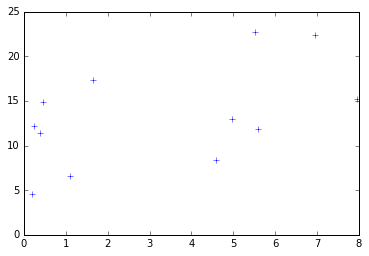

In [12]:
# Plot the data
plt.plot(clammy, psychopathy, '+')

In [13]:
def my_best_line(x):
    # Best prediction for psychopathy given clamminess
    return B[0] + B[1] * x

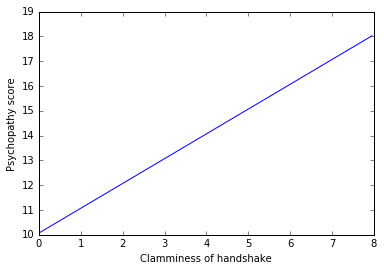

In [14]:
# Plot the new prediction
x_vals = [0, max(clammy)]
y_vals = [my_best_line(0), my_best_line(max(clammy))]
plt.plot(x_vals, y_vals)
plt.xlabel('Clamminess of handshake')
plt.ylabel('Psychopathy score')

Our claim was that this estimate for slope and intercept minimize the sum of
squared error:

In [15]:
fitted = X.dot(B)
errors = psychopathy - fitted
print(np.sum(errors ** 2))

252.92560645


Is this sum of squared errors smaller than our earlier guess of an
intercept of 10 and a slope of 0.9?

In [16]:
fitted = X.dot([10, 0.9])
errors = psychopathy - fitted
print(np.sum(errors ** 2))

255.75076072


# Contrasts

$\newcommand{cvec}{\mathbf{c}}$ We can combine the values in the
$\bhat$ vector in different ways by using a *contrast* vector. A
contrast vector $\cvec$ is a vector of weights
$c_1, c_2 ... c_p$ for each value in the $\bhat$ vector.
Assume that all vectors we've defined up until now are column vectors.
Then a scalar value that is a linear combination of the $\bhat$
values can be written:

$$
\cvec^T \bhat
$$

We now return to our original question, whether clamminess of handshake
predicts psychopathy score.

If clamminess does predict psychopathy, then we would expect the slope
of the best fit line between `clammy` and `psychopathy` would be
different from zero.

In our model, we have two predictors, the column of ones and `clammy`.
$p = 2$ and $\bhat$ is length 2. We could choose just the second of
the values in $\bhat$ (therefore $b_1$ if $b_0$ is the first
value) with a contrast:

$$
\left[
\begin{array}{\cvec}
0 \\
1 \\
\end{array}
\right]
$$

$\cvec^T \bhat$ with this contrast gives our *estimate* of the
slope relating `clammy` to `psychopathy`. Now we might be interested
if our estimate is further from zero than expected by chance.

To test whether the estimate is different from zero, we can divide the estimate
by the variability of the estimate. This gives us an idea of how far the
estimate is from zero, in terms of the variability of the estimate. We won't go
into the estimate of the variability here though, we'll just assume it (the
formula is in the code below). The estimate divided by the variability of the
estimate gives us a t statistic.

With that introduction, here's how to do the estimation and a t statistic given
the data $\yvec$, the design $\Xmat$, and a contrast vector
$\cvec$.

In [17]:
# Get t distribution code from scipy library
from scipy.stats import t as t_dist

In [18]:
def t_stat(y, X, c):
    """ betas, t statistic and significance test given data, design matrix, contrast

    This is OLS estimation; we assume the errors to have independent
    and identical normal distributions around zero for each $i$ in
    $\e_i$ (i.i.d).
    """
    # Make sure y, X, c are all arrays
    y = np.asarray(y)
    X = np.asarray(X)
    c = np.atleast_2d(c).T  # As column vector
    # Calculate the parameters - b hat
    beta = npl.pinv(X).dot(y)
    # The fitted values - y hat
    fitted = X.dot(beta)
    # Residual error
    errors = y - fitted
    # Residual sum of squares
    RSS = (errors**2).sum(axis=0)
    # Degrees of freedom is the number of observations n minus the number
    # of independent regressors we have used.  If all the regressor
    # columns in X are independent then the (matrix rank of X) == p
    # (where p the number of columns in X). If there is one column that
    # can be expressed as a linear sum of the other columns then
    # (matrix rank of X) will be p - 1 - and so on.
    df = X.shape[0] - npl.matrix_rank(X)
    # Mean residual sum of squares
    MRSS = RSS / df
    # calculate bottom half of t statistic
    SE = np.sqrt(MRSS * c.T.dot(npl.pinv(X.T.dot(X)).dot(c)))
    t = c.T.dot(beta) / SE
    # Get p value for t value using cumulative density dunction
    # (CDF) of t distribution
    ltp = t_dist.cdf(t, df) # lower tail p
    p = 1 - ltp # upper tail p
    return beta, t, df, p

See [p values from cumulative distribution functions](https://matthew-brett.github.io/teaching/on_cdfs.html) for background on the probability values.

So, does `clammy` predict `psychopathy`? If it does not, then our
estimate of the slope will not be convincingly different from 0. The t
test divides our estimate of the slope by the error in the estimate;
large values mean that the slope is large compared to the error in the
estimate.

In [19]:
X = np.column_stack((np.ones(12), clammy))
Y = np.asarray(psychopathy)
B, t, df, p = t_stat(Y, X, [0, 1])
t, p

(array([[ 1.914389]]), array([[ 0.042295]]))

<!-- dummy-coding: -->
# Dummy coding and the general linear model

So far we have been doing *multiple regression*. That is, all the
columns (except the column of ones) are continuous vectors of numbers
predicting our outcome data `psychopathy`. These type of predictors
are often called *covariates*.

It turns out we can use this same framework to express the fact that
different observations come from different groups.

Expressing group membership in this way allows us to express *analysis
of variance* designs using this same notation.

To do this, we use columns of *dummy variables*.

Let's say we get some new and interesting information. The first 4
students come from Berkeley, the second set of 4 come from Stanford, and
the last set of 4 come from MIT. Maybe the student's college predicts if
they are a psychopath?

How do we express this information? Let's forget about the clamminess
score for now and just use the school information. Our model might be
that we can best predict the psychopathy scores by approximating the
individual student psychopathy scores with a mean score for the relevant
school:

$$
y_i = \mu_{Berkeley} + e_i  \space\mbox{if}\space 1 \le i \le 4

y_i = \mu_{Stanford} + e_i \space\mbox{if}\space 5 \le i \le 8

y_i = \mu_{MIT} + e_i \space\mbox{if}\space 9 \le i \le 12
$$

We can code this with predictors in our design using *indicator
variables*. The "Berkeley" indicator variable vector is 1 when the
student is from Berkeley and zero otherwise. Similarly for the other two
schools:

In [20]:
berkeley_indicator = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
stanford_indicator = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
mit_indicator      = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
X = np.column_stack((berkeley_indicator,
                    stanford_indicator,
                    mit_indicator))
X

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

These indicator columns are *dummy variables* where the values code for
the group membership.

Now the $\bvec$ vector will be:

$$
\left[
\begin{array}{\bvec}
\mu_{Berkeley} \\
\mu_{Stanford} \\
\mu_{MIT} \\
\end{array}
\right]
$$

When we estimate these using the least squares method, what estimates
will we get for $\bhat$?

In [21]:
B = npl.pinv(X).dot(psychopathy)
B

array([ 10.74225,  11.3355 ,  18.03425])

In [22]:
np.mean(psychopathy[:4])
np.mean(psychopathy[4:8])
np.mean(psychopathy[8:])

18.03425

It looks like the MIT students are a bit more psychopathic. Are they more
psychopathic than Berkeley and Stanford?

We can use a contrast to test whether the mean for the MIT students is greater
than the mean of (mean for Berkeley, mean for Stanford):

In [23]:
B, t, df, p = t_stat(psychopathy, X, [-0.5, -0.5, 1])
t, p

(array([[ 2.340356]]), array([[ 0.021997]]))

Ah — yes — just as we suspected.

The model above expresses the effect of group membership. It is the
expression of a one-way analysis of variance (ANOVA) model using
$\yvec = \Xmat \bvec + \evec$.

# ANCOVA in the General Linear Model

Our formulation $\yvec = \Xmat \bvec + \evec$ makes it very easy
to add extra regressors to models with group membership. For example, we
can easily make a simple ANCOVA model (analysis of covariance).

ANCOVA is a specific term for the case where we have a model with both
group membership (ANOVA model) and one or more continuous covariates.

For example, we can add back our clamminess score to the mix. Does it
explain anything once we know which school the student is at?

In [24]:
X = np.column_stack((berkeley_indicator,
                     stanford_indicator,
                     mit_indicator,
                     clammy))
X

array([[ 1.   ,  0.   ,  0.   ,  0.389],
       [ 1.   ,  0.   ,  0.   ,  0.2  ],
       [ 1.   ,  0.   ,  0.   ,  0.241],
       [ 1.   ,  0.   ,  0.   ,  0.463],
       [ 0.   ,  1.   ,  0.   ,  4.585],
       [ 0.   ,  1.   ,  0.   ,  1.097],
       [ 0.   ,  1.   ,  0.   ,  1.642],
       [ 0.   ,  1.   ,  0.   ,  4.972],
       [ 0.   ,  0.   ,  1.   ,  7.957],
       [ 0.   ,  0.   ,  1.   ,  5.585],
       [ 0.   ,  0.   ,  1.   ,  5.527],
       [ 0.   ,  0.   ,  1.   ,  6.964]])

We test the independent effect of the clamminess score with a contrast
on the clammy slope parameter:

In [25]:
B, t, df, p = t_stat(psychopathy, X, [0, 0, 0, 1])
t, p

(array([[-0.010661]]), array([[ 0.504122]]))

It looks like there's not much independent effect of clamminess. The MIT
students seem to have clammy hands, and once we know that the student is
from MIT, the clammy score is not as useful.

# Displaying the design matrix as an image

We can show the design as an image, by scaling the values with columns.

We scale within columns because we care more about seeing variation
within the regressor than between regressors. For example, if we have a
regressor varying between 0 and 1, and another between 0 and 1000,
without scaling, the column with the larger numbers will swamp the
variation in the column with the smaller numbers.

In [26]:
def scale_design_mtx(X):
    """utility to scale the design matrix for display

    This scales the columns to their own range so we can see the variations
    across the column for all the columns, regardless of the scaling of the
    column.
    """
    mi, ma = X.min(axis=0), X.max(axis=0)
    # Vector that is True for columns where values are not
    # all almost equal to each other
    col_neq = (ma - mi) > 1.e-8
    Xs = np.ones_like(X)
    # Leave columns with same value throughout with 1s
    # Scale other columns to min, max in column
    mi = mi[col_neq]
    ma = ma[col_neq]
    Xs[:,col_neq] = (X[:,col_neq] - mi)/(ma - mi)
    return Xs

Then we can display this scaled design with a title and some default
image display parameters:

In [27]:
def show_design(X, design_title):
    """ Show the design matrix nicely """
    plt.imshow(scale_design_mtx(X),
               interpolation='nearest',
               cmap='gray') # Gray colormap
    plt.title(design_title)

We can then see our ANCOVA design above at a glance:

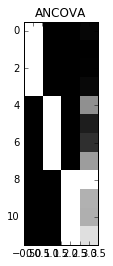

In [28]:
show_design(X, 'ANCOVA')

<!-- A file containing links and substitutions -->
<!-- vim: ft=rst -->
<!-- Version control -->
<!-- Editors -->
<!-- Python and common libraries -->
<!-- Virtualenv and helpers -->
<!-- Pypi and packaging -->
<!-- Mac development -->
<!-- Windows development -->
<!-- Nipy and friends -->
<!-- Mathematics -->
<!-- Licenses -->
<!-- Neuroimaging stuff -->
<!-- People -->
<!-- Substitutions -->